In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Data Exploration

In [175]:
df = pd.read_csv("stroke_prediction_dataset.csv", sep=";")

In [176]:
df.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

In [178]:
df.describe()

,Patient ID,Age,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Stroke History,Stress Levels
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,49715.802867,54.035667,0.249000,0.502933,129.445209,27.474302,0.500267,5.022694
std,29000.656642,21.063111,0.432448,0.500008,40.487792,7.230201,0.500017,2.873223
min,1.000000,18.000000,0.000000,0.000000,60.000000,15.010000,0.000000,0.000000
25%,24562.000000,36.000000,0.000000,0.000000,94.517500,21.160000,0.000000,2.540000
50%,49448.000000,54.000000,0.000000,1.000000,128.900000,27.420000,1.000000,5.050000
75%,75112.000000,72.000000,0.000000,1.000000,164.592500,33.720000,1.000000,7.520000
max,99975.000000,90.000000,1.000000,1.000000,200.000000,40.000000,1.000000,10.000000


In [179]:
df.columns

Index(['Patient ID', 'Patient Name', 'Age', 'Gender', 'Hypertension',
       'Heart Disease', 'Marital Status', 'Work Type', 'Residence Type',
       'Average Glucose Level', 'Body Mass Index (BMI)', 'Smoking Status',
       'Alcohol Intake', 'Physical Activity', 'Stroke History',
       'Family History of Stroke', 'Dietary Habits', 'Stress Levels',
       'Blood Pressure Levels', 'Cholesterol Levels', 'Symptoms', 'Diagnosis'],
      dtype='object')

In [180]:
df.columns = df.columns.str.replace(" ","_").str.lower().str.strip()

In [181]:
df.columns

Index(['patient_id', 'patient_name', 'age', 'gender', 'hypertension',
       'heart_disease', 'marital_status', 'work_type', 'residence_type',
       'average_glucose_level', 'body_mass_index_(bmi)', 'smoking_status',
       'alcohol_intake', 'physical_activity', 'stroke_history',
       'family_history_of_stroke', 'dietary_habits', 'stress_levels',
       'blood_pressure_levels', 'cholesterol_levels', 'symptoms', 'diagnosis'],
      dtype='object')

In [182]:
df.duplicated().sum()

np.int64(0)

In [183]:
df.isnull().sum()

patient_id                     0
patient_name                   0
age                            0
gender                         0
hypertension                   0
heart_disease                  0
marital_status                 0
work_type                      0
residence_type                 0
average_glucose_level          0
body_mass_index_(bmi)          0
smoking_status                 0
alcohol_intake                 0
physical_activity              0
stroke_history                 0
family_history_of_stroke       0
dietary_habits                 0
stress_levels                  0
blood_pressure_levels          0
cholesterol_levels             0
symptoms                    2500
diagnosis                      0
dtype: int64

In [184]:
df.isnull().mean()*100

patient_id                   0.000000
patient_name                 0.000000
age                          0.000000
gender                       0.000000
hypertension                 0.000000
heart_disease                0.000000
marital_status               0.000000
work_type                    0.000000
residence_type               0.000000
average_glucose_level        0.000000
body_mass_index_(bmi)        0.000000
smoking_status               0.000000
alcohol_intake               0.000000
physical_activity            0.000000
stroke_history               0.000000
family_history_of_stroke     0.000000
dietary_habits               0.000000
stress_levels                0.000000
blood_pressure_levels        0.000000
cholesterol_levels           0.000000
symptoms                    16.666667
diagnosis                    0.000000
dtype: float64

In [185]:
df["age"].value_counts()

age
33    244
45    236
89    232
75    229
68    228
     ... 
56    181
81    179
44    179
60    177
80    173
Name: count, Length: 73, dtype: int64

In [186]:
df["gender"].value_counts()

gender
Male      7622
Female    7378
Name: count, dtype: int64

In [187]:
df["hypertension"].value_counts()

hypertension
0    11265
1     3735
Name: count, dtype: int64

In [188]:
df["heart_disease"].value_counts()

heart_disease
1    7544
0    7456
Name: count, dtype: int64

In [189]:
df["marital_status"].value_counts()

marital_status
Single      5156
Divorced    4980
Married     4864
Name: count, dtype: int64

In [190]:
df["work_type"].value_counts()

work_type
Private           3863
Self-employed     3855
Government Job    3710
Never Worked      3572
Name: count, dtype: int64

In [191]:
df["residence_type"].value_counts()

residence_type
Rural    7529
Urban    7471
Name: count, dtype: int64

In [192]:
df["average_glucose_level"].value_counts()

average_glucose_level
167.06    7
113.70    6
133.94    6
66.66     6
70.18     6
         ..
191.32    1
162.42    1
161.23    1
161.14    1
130.71    1
Name: count, Length: 9215, dtype: int64

In [193]:
df["body_mass_index_(bmi)"].value_counts()

body_mass_index_(bmi)
20.59    16
22.34    15
15.85    15
36.10    15
23.70    14
         ..
37.18     1
27.75     1
20.64     1
39.34     1
22.18     1
Name: count, Length: 2490, dtype: int64

In [194]:
df["smoking_status"].value_counts()

smoking_status
Currently Smokes    5011
Non-smoker          5009
Formerly Smoked     4980
Name: count, dtype: int64

In [195]:
df["alcohol_intake"].value_counts()

alcohol_intake
Rarely              3821
Social Drinker      3745
Never               3729
Frequent Drinker    3705
Name: count, dtype: int64

In [196]:
df["physical_activity"].value_counts()

physical_activity
High        5060
Moderate    4998
Low         4942
Name: count, dtype: int64

In [197]:
df["stroke_history"].value_counts()

stroke_history
1    7504
0    7496
Name: count, dtype: int64

In [198]:
df["family_history_of_stroke"].value_counts()

family_history_of_stroke
Yes    7592
No     7408
Name: count, dtype: int64

In [199]:
df["dietary_habits"].value_counts()

dietary_habits
Paleo             2192
Vegan             2185
Vegetarian        2170
Non-Vegetarian    2144
Keto              2135
Pescatarian       2106
Gluten-Free       2068
Name: count, dtype: int64

In [200]:
df["stress_levels"].value_counts()

stress_levels
2.08     30
6.32     30
9.05     29
2.49     27
0.44     27
         ..
4.24      6
3.41      6
5.89      4
10.00     3
5.63      3
Name: count, Length: 1001, dtype: int64

In [201]:
df["blood_pressure_levels"].value_counts()

blood_pressure_levels
96/70      14
157/73     12
112/81     11
141/74     11
160/67     11
           ..
165/97      1
151/102     1
121/104     1
97/99       1
172/83      1
Name: count, Length: 4458, dtype: int64

In [202]:
df["cholesterol_levels"].value_counts()

cholesterol_levels
HDL: 50, LDL: 185    9
HDL: 45, LDL: 146    9
HDL: 74, LDL: 91     9
HDL: 77, LDL: 88     9
HDL: 74, LDL: 144    8
                    ..
HDL: 68, LDL: 62     1
HDL: 75, LDL: 135    1
HDL: 71, LDL: 150    1
HDL: 69, LDL: 97     1
HDL: 69, LDL: 98     1
Name: count, Length: 5952, dtype: int64

In [203]:
df["symptoms"].value_counts()

symptoms
Difficulty Speaking                                                         268
Numbness                                                                    254
Headache                                                                    253
Blurred Vision                                                              251
Seizures                                                                    249
                                                                           ... 
Numbness, Numbness, Blurred Vision, Severe Fatigue                            1
Loss of Balance, Dizziness, Headache, Confusion                               1
Dizziness, Blurred Vision, Weakness, Headache, Confusion                      1
Numbness, Difficulty Speaking, Loss of Balance, Headache, Severe Fatigue      1
Severe Fatigue, Numbness, Confusion, Dizziness, Loss of Balance               1
Name: count, Length: 5786, dtype: int64

In [204]:
df["diagnosis"].value_counts()

diagnosis
No Stroke    7532
Stroke       7468
Name: count, dtype: int64

# Data PreProcessing

In [205]:
df["age_group"]=df["age"].apply(lambda x:"Infant" if (x>=0)&(x<=2)
                                  else ("Child" if (x>2)&(x<=12)
                                  else ("Adolescent"if (x>12)&(x<=18)  
                                  else ("Young Adults"if (x>19)&(x<=35)  
                                  else ("Middle Aged Adults" if (x>35)&(x<=60) 
                                  else "Old Aged Adults")))))

In [206]:
df["glucose_category"] = df["average_glucose_level"].apply(
    lambda x: "Normal" if x < 140 else 
              ("Prediabetes" if x < 200 else "Diabetes")
)

In [207]:
df["status_of_bmi"] = df["body_mass_index_(bmi)"].apply(lambda x:"Underweight" if x<18.5
                                  else ("Normal weight" if (x>=18.5)&(x<+24.9)
                                  else ("Overweight"if (x>=25)&(x<=29.9)  
                                  else "Obesity")))

In [208]:
df["blood_pressure_levels"] = df["blood_pressure_levels"].str.split("/").apply(lambda x: [int(x[0]), int(x[1])])


In [209]:
df["blood_pressure_category"] = df["blood_pressure_levels"].apply(
    lambda bp: "Low Blood Pressure" if bp[0] < 90 and bp[1] < 60 else
               "Normal" if 90 <= bp[0] <= 120 and 60 <= bp[1] <= 80 else
               "Prehypertension" if 120 < bp[0] <= 139 or 80 < bp[1] <= 89 else
               "Hypertension Stage 1" if 140 <= bp[0] <= 159 or 90 <= bp[1] <= 99 else
               "Hypertension Stage 2" if 160 <= bp[0] <= 179 or 100 <= bp[1] <= 109 else
               "Hypertension Stage 3"
)

In [210]:
df["cholesterol_levels"] =df["cholesterol_levels"].str.replace(","," ").str.split()

In [211]:
df["status_of_HDL"] = df["cholesterol_levels"].apply(lambda x:"Low" if int(x[1])<50 
                                                     else ("Acceptable" if (int(x[1])>=50)&(int(x[1])<60)
                                                        else "High"))

In [212]:
df["status_of_LDL"] = df["cholesterol_levels"].apply(lambda x:"Optimal" if int(x[3])<100 
                                                     else ("Near Optimal" if (int(x[3])>=100)&(int(x[3])<130)
                                                        else( "Borderline High" if (int(x[3])>=130)&(int(x[3])<160)
                                                        else( "High" if (int(x[3])>=160)&(int(x[3])<190)
                                                        else "Very High"))))

In [213]:
df["symptoms"] = df["symptoms"].fillna(df["symptoms"].mode()[0])
mlb = MultiLabelBinarizer()
symptoms_encoded = mlb.fit_transform(df["symptoms"].str.split(", "))
symptoms_df = pd.DataFrame(symptoms_encoded, columns=mlb.classes_, index=df.index)
df = df.join(symptoms_df)

In [214]:
df.drop(columns=["patient_name", "patient_id", "blood_pressure_levels", 
                 "cholesterol_levels", "symptoms"], 
        inplace=True)

In [215]:
df.to_csv("50%.csv", index=False)

# Data Visualization

In [ ]:
cat_col = df.select_dtypes(include=object).columns
cat_col = [col for col in cat_col if col != "Symptoms"]

In [ ]:
for col in cat_col:
    fig = px.histogram(df, x=col, color="diagnosis", title=f"Histogram of {col} by diagnosis")
    fig.write_html(f"histogram_{col}.html")

In [ ]:
for col in cat_col:
    count_series = df[col].value_counts()
    count_df = count_series.reset_index()
    count_df.columns = [col, "count"]
    
    fig = px.pie(count_df, names=col, values="count", title=f"Pie chart of {col}")
    fig.write_html(f"pie_{col}.html")  

# Data Transformation

In [219]:
df["gender"] = df["gender"].map({"Male": 1, "Female": 0})

In [220]:
df["residence_type"] = df["residence_type"].map({"Rural": 0, "Urban": 1})

In [221]:
df["family_history_of_stroke"] = df["family_history_of_stroke"].map({"Yes": 1, "No": 0})

In [222]:
df["diagnosis"] = df["diagnosis"].map({"Stroke": 1, "No Stroke": 0})

In [223]:
categorical_cols = ["marital_status", "work_type", "glucose_category", "smoking_status",
                   "alcohol_intake", "physical_activity", "dietary_habits", "age_group",
                   "status_of_bmi", "blood_pressure_category", "status_of_HDL", "status_of_LDL"]

In [224]:
df = pd.get_dummies(df, columns=categorical_cols, dtype=int)

# Modeling

In [225]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [226]:
scaler = MinMaxScaler()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [230]:
xgb = XGBClassifier(
    eval_metric="logloss",
    random_state=42,
    max_depth=7,
    n_estimators=200,
    learning_rate=0.1,
    reg_alpha=0.0,
    reg_lambda=0.0
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", round(accuracy_score(y_test, y_pred_xgb) * 100, 2), "%")

XGBoost Accuracy: 50.4 %


[0]	train-logloss:0.68633	val-logloss:0.69361
[10]	train-logloss:0.64998	val-logloss:0.69985
[20]	train-logloss:0.61643	val-logloss:0.70238
[30]	train-logloss:0.58522	val-logloss:0.70385
[40]	train-logloss:0.55720	val-logloss:0.70788
[50]	train-logloss:0.53589	val-logloss:0.71154
[60]	train-logloss:0.51798	val-logloss:0.71286
[70]	train-logloss:0.49469	val-logloss:0.71719
[80]	train-logloss:0.47308	val-logloss:0.71864
[90]	train-logloss:0.45624	val-logloss:0.72168
[100]	train-logloss:0.43340	val-logloss:0.72475
[110]	train-logloss:0.41767	val-logloss:0.72648
[120]	train-logloss:0.40476	val-logloss:0.72759
[130]	train-logloss:0.39111	val-logloss:0.72960
[140]	train-logloss:0.37520	val-logloss:0.73118
[150]	train-logloss:0.36411	val-logloss:0.73196
[160]	train-logloss:0.35080	val-logloss:0.73425
[170]	train-logloss:0.34299	val-logloss:0.73534
[180]	train-logloss:0.33248	val-logloss:0.73808
[190]	train-logloss:0.31864	val-logloss:0.74294
[199]	train-logloss:0.30718	val-logloss:0.74520


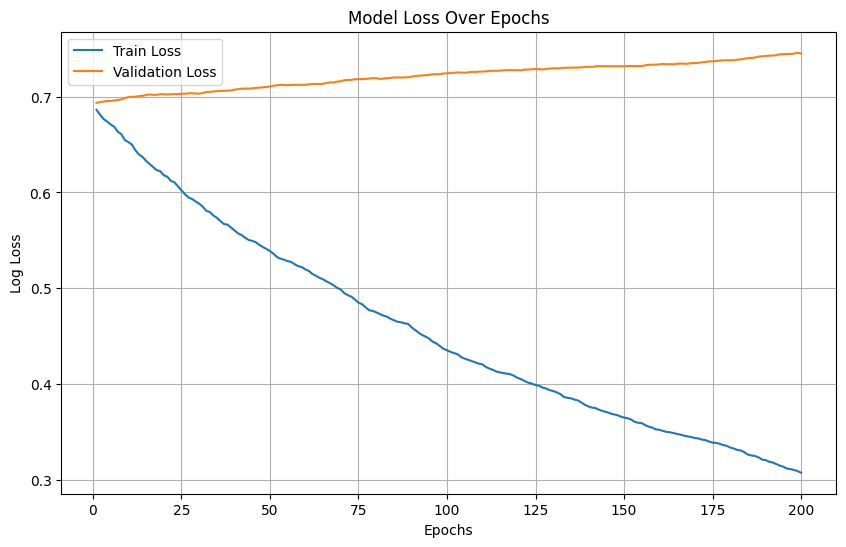

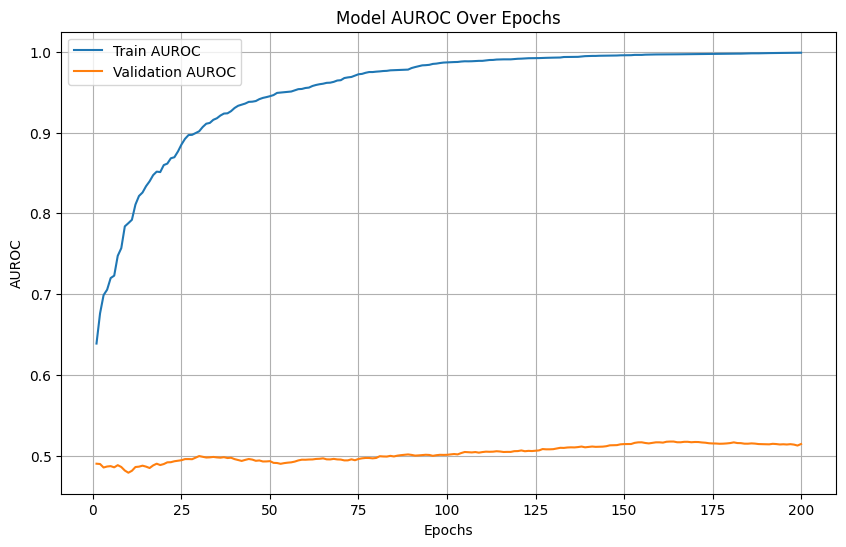

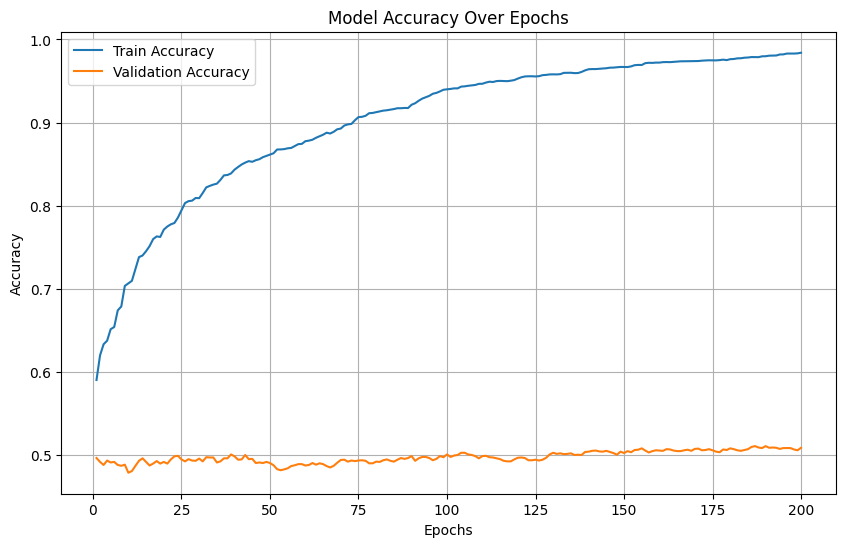

Final Test Accuracy: 50.4%
Final Test AUROC: 0.5069


In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split

# Giả sử X và y đã được tiền xử lý từ đoạn mã của bạn
# Chia dữ liệu thành tập huấn luyện, validation và kiểm tra
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

# Chuyển dữ liệu sang định dạng DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Thiết lập tham số cho XGBoost
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "max_depth": 7,
    "eta": 0.1,  # learning_rate
    "alpha": 0.0,
    "lambda": 0.0,
    "seed": 42
}

# Danh sách để lưu các chỉ số qua từng epoch
train_loss = []
val_loss = []
train_auroc = []
val_auroc = []
train_accuracy = []
val_accuracy = []

# Huấn luyện mô hình và thu thập chỉ số
num_rounds = 200
evals_result = {}  # Lưu kết quả đánh giá
bst = xgb.train(
    params, 
    dtrain, 
    num_boost_round=num_rounds, 
    evals=[(dtrain, "train"), (dval, "val")], 
    evals_result=evals_result, 
    verbose_eval=10
)

# Thu thập các chỉ số qua từng epoch
for i in range(num_rounds):
    # Loss
    train_loss.append(evals_result["train"]["logloss"][i])
    val_loss.append(evals_result["val"]["logloss"][i])
    
    # Dự đoán xác suất
    train_pred = bst.predict(dtrain, iteration_range=(0, i+1))
    val_pred = bst.predict(dval, iteration_range=(0, i+1))
    
    # AUROC
    train_auroc.append(roc_auc_score(y_train, train_pred))
    val_auroc.append(roc_auc_score(y_val, val_pred))
    
    # Accuracy
    train_pred_binary = [1 if p > 0.5 else 0 for p in train_pred]
    val_pred_binary = [1 if p > 0.5 else 0 for p in val_pred]
    train_accuracy.append(accuracy_score(y_train, train_pred_binary))
    val_accuracy.append(accuracy_score(y_val, val_pred_binary))

# Vẽ biểu đồ
epochs = range(1, num_rounds + 1)

# 1. Biểu đồ Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.title("Model Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.legend()
plt.grid(True)
plt.savefig("model_loss.png")
plt.show()

# 2. Biểu đồ AUROC
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_auroc, label="Train AUROC")
plt.plot(epochs, val_auroc, label="Validation AUROC")
plt.title("Model AUROC Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("AUROC")
plt.legend()
plt.grid(True)
plt.savefig("model_auroc.png")
plt.show()

# 3. Biểu đồ Accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label="Train Accuracy")
plt.plot(epochs, val_accuracy, label="Validation Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.savefig("model_accuracy.png")
plt.show()

# Dự đoán cuối cùng trên tập kiểm tra
y_pred = bst.predict(dtest)
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]
final_accuracy = accuracy_score(y_test, y_pred_binary)
final_auroc = roc_auc_score(y_test, y_pred)
print(f"Final Test Accuracy: {round(final_accuracy * 100, 2)}%")
print(f"Final Test AUROC: {round(final_auroc, 4)}")